In [148]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [109]:
root_dir = "data/natural_images/"
folders = os.listdir(root_dir);

In [123]:
data = []
labels = []

In [124]:
for label in folders:
    path = 'data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        img = cv2.imread(path + image_path)
        img = cv2.resize(img, (32,32))
        data.append(np.array(img))
        labels.append(label)

In [125]:
data = np.array(data)
labels = np.array(labels)

In [126]:
data.shape, labels.shape

((6899, 32, 32, 3), (6899,))

In [127]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [128]:
labels = to_categorical(labels)

In [129]:
data.shape, labels.shape

((6899, 32, 32, 3), (6899, 8))

In [130]:
rand = np.arange(6899)
np.random.shuffle(rand)

In [131]:
data = data[rand]
labels = labels[rand]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=4242)

In [142]:
model = Sequential([
    Conv2D(32, (5, 5), padding="same", activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation=LeakyReLU(0.002)),
    MaxPool2D((2, 2)),
    
    Dropout(0.3),
    Flatten(),
    Dense(256),
    Dropout(0.3),
    Dense(8, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [143]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [144]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_split=0.25,
    batch_size=32 
)

Epoch 1/10
130/130 [==============================] - 4s 24ms/step - loss: 14.0494 - accuracy: 0.4873 - val_loss: 0.9464 - val_accuracy: 0.6659
Epoch 2/10
130/130 [==============================] - 3s 22ms/step - loss: 0.8839 - accuracy: 0.7067 - val_loss: 0.7514 - val_accuracy: 0.7326
Epoch 3/10
130/130 [==============================] - 3s 23ms/step - loss: 0.6391 - accuracy: 0.7787 - val_loss: 0.6885 - val_accuracy: 0.7645
Epoch 4/10
130/130 [==============================] - 3s 22ms/step - loss: 0.5341 - accuracy: 0.8198 - val_loss: 0.6674 - val_accuracy: 0.7884
Epoch 5/10
130/130 [==============================] - 3s 22ms/step - loss: 0.4729 - accuracy: 0.8417 - val_loss: 0.6740 - val_accuracy: 0.7964
Epoch 6/10
130/130 [==============================] - 3s 23ms/step - loss: 0.4373 - accuracy: 0.8553 - val_loss: 0.6198 - val_accuracy: 0.8232
Epoch 7/10
130/130 [==============================] - 4s 28ms/step - loss: 0.3935 - accuracy: 0.8645 - val_loss: 0.6439 - val_accuracy: 0.813

In [145]:
model.save("natural.h5")

In [146]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,14.049450,0.487316,0.946434,0.665942
1,0.883852,0.706692,0.751370,0.732609
2,0.639103,0.778691,0.688543,0.764493
3,0.534099,0.819763,0.667419,0.788406
4,0.472893,0.841749,0.674029,0.796377


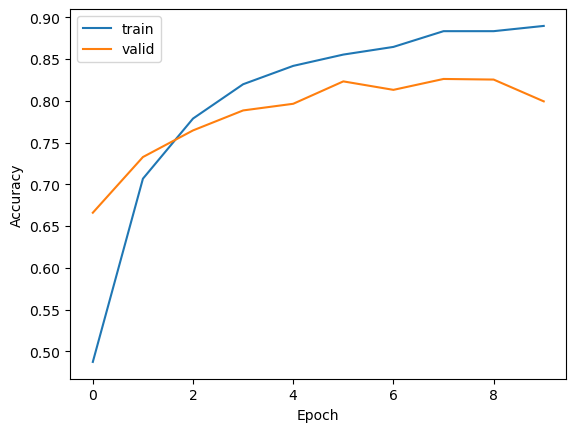

In [149]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

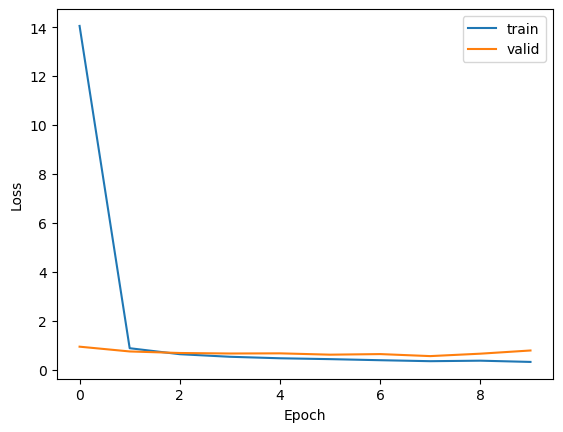

In [150]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

In [151]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 6ms/step - loss: 0.7348 - accuracy: 0.8254


In [152]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 5ms/step


In [157]:
y_pred = to_categorical(y_pred)

In [162]:
y_pred[1]

array([0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [163]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [164]:
y_test[1] == y_pred[1]

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [165]:
y_pred.shape

(1380, 8)